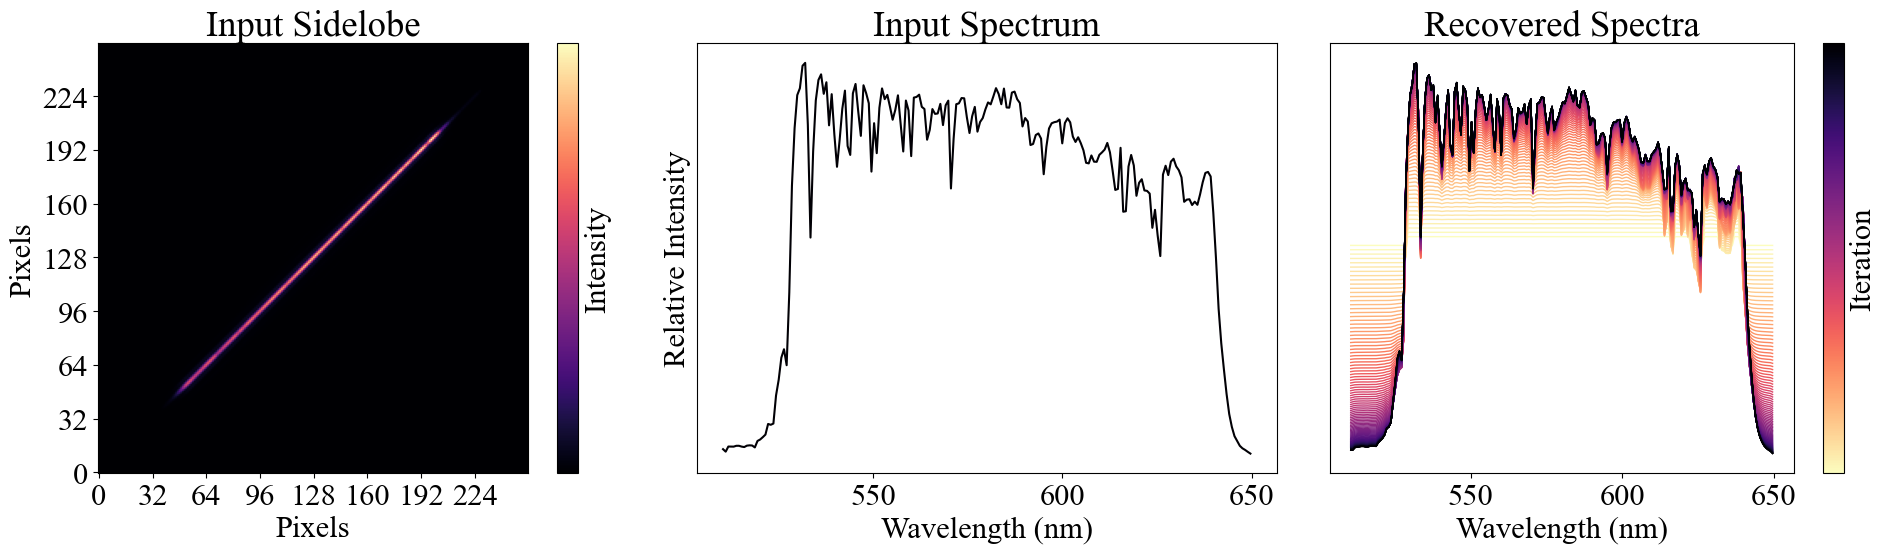

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import pickle
import dLux.utils as dlu

import os

# Get the directory of the current notebook
notebook_dir = os.getcwd()
os.chdir(notebook_dir)

# Load saved data
sidelobes = np.load("sidelobes.npy")
bin_centers = np.load("bin_centers.npy")
input_weights = np.load("input_weights.npy")
with open("output_weights.pkl", "rb") as f:
    output_weights_list = pickle.load(f)

# # Downsample function (mock version – replace with your actual `dlu.downsample`)
# def downsample(arr, factor):
#     return arr[::factor, ::factor]

# Set plot style
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 22

cmap = plt.get_cmap('magma')

plt.figure(figsize=(20, 6))

# Plot 1: Input Sidelobe
plt.subplot(1, 3, 1)
image_data = dlu.downsample(sidelobes, 2)
plt.imshow(image_data, origin='lower', cmap=cmap)
plt.title('Input Sidelobe')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
tick_spacing = 32
plt.xticks(np.arange(0, image_data.shape[1], tick_spacing))
plt.yticks(np.arange(0, image_data.shape[0], tick_spacing))
cbar = plt.colorbar()
cbar.set_ticks([])
cbar.ax.set_ylabel('Intensity')

# Plot 2: Input Spectrum
plt.subplot(1, 3, 2)
plt.plot(bin_centers * 1e9, input_weights, color=cmap(1))
plt.gca().tick_params(axis='y', left=False, labelleft=False)
plt.xlabel("Wavelength (nm)")
plt.title("Input Spectrum")
plt.ylabel('Relative Intensity')

# Plot 3: Recovered Spectra
plt.subplot(1, 3, 3)
norm = colors.Normalize(vmin=0, vmax=99)
for i, output_weights in enumerate(output_weights_list):
    color = cmap(1 - i / 99)
    plt.plot(bin_centers * 1e9, output_weights, color=color, alpha=1, linewidth=1)

plt.gca().tick_params(axis='y', left=False, labelleft=False)
plt.xlabel("Wavelength (nm)")
plt.title("Recovered Spectra")

# Colorbar for iterations
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label="Iteration")
cbar.ax.invert_yaxis()
cbar.set_ticks([])

plt.tight_layout()
plt.savefig('swag.pdf',dpi=300,bbox_inches='tight')
plt.show()
